-----------------------------
#### Sequence modeling - RNN explained

Using Keras (SimpleRNN)  

- To Understand `return state` and `return sequences`


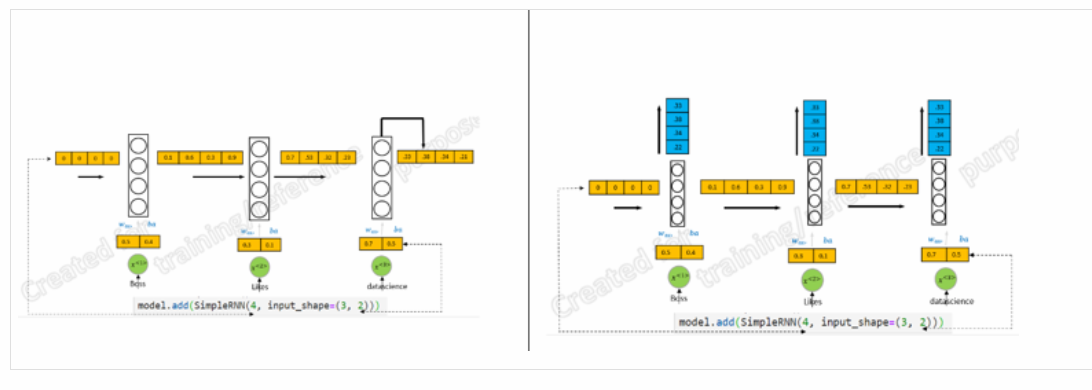


- **Return State**:
  - Configured to return only the final hidden state after processing the entire input sequence.
  - Useful for tasks where the model captures and utilizes information learned from the entire input sequence.
  - Outputs a single vector representing the aggregated knowledge of the entire sequence.
  - Ideal for tasks that require a compact representation, such as classification.

- **Return Sequences**:
  - Configured to return the hidden states at each time step throughout the sequence.
  - Maintains the sequential information at each time step.
  - Beneficial for tasks where temporal dynamics are crucial, such as predicting the next element in a sequence.
  - Captures dependencies between distant elements, allowing for more nuanced understanding of the sequence.


In [1]:
import tensorflow
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN

np.set_printoptions(suppress=True, edgeitems=20, precision=6, linewidth=100)

#### arguments in SimpleRNN

|Arg name | Description|
|---------| -----------|
|units: |Positive integer, dimensionality of the output space.|
|activation: |Activation function to use. Default: hyperbolic tangent (tanh). If you pass None, no activation is applied (ie. "linear" activation: a(x) = x).|
|use_bias: |Boolean, (default True), whether the layer uses a bias vector.|
|kernel_initializer: |Initializer for the kernel weights matrix, used for the linear transformation of the inputs. Default: `glorot_uniform.`|
|recurrent_initializer: |Initializer for the recurrent_kernel weights matrix, used for the linear transformation of the recurrent state. Default: `orthogonal.`|
|bias_initializer: |Initializer for the bias vector. Default: zeros.|
|kernel_regularizer: |Regularizer function applied to the kernel weights matrix. `Default: None`.|
|recurrent_regularizer: |Regularizer function applied to the recurrent_kernel weights matrix. `Default: None`.|
|bias_regularizer: |Regularizer function applied to the bias vector. `Default: None`.|
|activity_regularizer: |Regularizer function applied to the output of the layer (its "activation"). Default: None.|
|kernel_constraint: |Constraint function applied to the kernel weights matrix. `Default: None`.|
|recurrent_constraint: |Constraint function applied to the recurrent_kernel weights matrix. Default: None.|
|bias_constraint: |Constraint function applied to the bias vector. Default: None.|
dropout: Float between 0 and 1. Fraction of the units to drop for the linear transformation of the inputs. Default: 0.
|recurrent_dropout: |Float between 0 and 1. Fraction of the units to drop for the linear transformation of the recurrent state. `Default: 0`.|
|`return_sequences`: |Boolean. Whether to return the last output in the output sequence, or the full sequence. `Default: False.`|
|`return_stat`e: |Boolean. Whether to return the `last state` in addition to the output. `Default: False`|
|go_backwards: |Boolean (default False). If True, process the input sequence backwards and return the reversed sequence.|
|stateful: |Boolean (default False). If True, the last state for each sample at index i in a batch will be used as initial state for the sample of index i in the following batch.|
|unroll: |Boolean (default False). If True, the network will be unrolled, else a symbolic loop will be used. Unrolling can speed-up a RNN, although it tends to be more memory-intensive. Unrolling is only suitable for short sequences.|

**data setup for SimpleRNN**

- `input_shape=(3, 2)`:

    - We have 3 words: _Jai_, _likes_, _AI_. 
    - So, number of time-steps is 3. 
    - The RNN block unfolds 3 times, and so we see 3 RNN blocks .
    - For each word, we pass the word embedding of size 2 to the network.

- `SimpleRNN(7, …)`:
    - 7 units in the hidden layer.
    - hidden state of size 7 is passed between the RNN blocks
    - For the first block, since there is no previous output, so previous hidden state is set to [0, 0, 0, 0, 0, 0, 0]
    - Thus for a whole sentence, we get a vector of size 7 as output from the RNN layer

In [9]:
# samples   = 2
# sequences = 3 for each sample, number of time steps (number of words in a sentence)
# features  = 2 for each sequence step (time step)

nbr_samples   = 2
nbr_timesteps = 3
nbr_features  = 2       # number of features = size of embeddings

inputs = np.random.random([nbr_samples, nbr_timesteps, nbr_features]).astype(np.float32)
inputs

array([[[0.686661, 0.176567],
        [0.014168, 0.049721],
        [0.428151, 0.463251]],

       [[0.214774, 0.607099],
        [0.720777, 0.389025],
        [0.041535, 0.631306]]], dtype=float32)

In [7]:
memory_len = 4

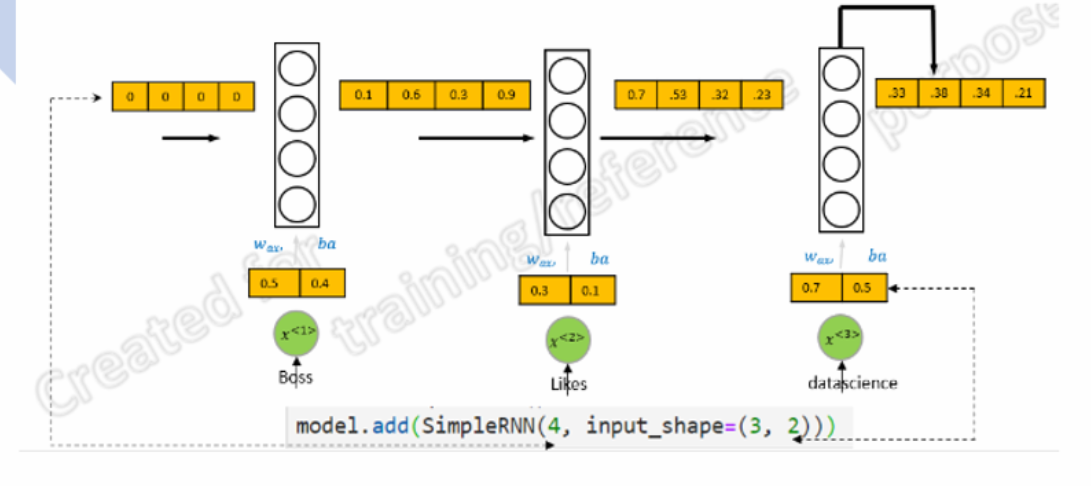

In [10]:
# model with no return sequences
model1 = Sequential()
model1.add(SimpleRNN(units           = memory_len, 
                     return_sequences= False))

output1 = model1(inputs)

output1.numpy() 

# no return sequences, only the final output, (hidden state or memory/context)
# this is useful in applications like text classification or sentiment analysis

array([[ 0.300727,  0.061517,  0.330502,  0.074437],
       [ 0.435614, -0.37093 ,  0.446261,  0.08077 ]], dtype=float32)

The output corresponds to the final hidden state of the RNN for `each sample` in the input sequence.

Note : 
1. when you move from one sample to the next, the `hidden state` is typically `reset` or initialized based on the initial state configuration.

2. In the case of the Keras Sequential model, the `hidden state` is initialized to zeros at the beginning of each sample.

In [12]:
# model with return sequences
model2 = Sequential()
model2.add(SimpleRNN(units=memory_len, 
                     return_sequences=True))

output2 = model2(inputs)

output2.numpy()

# all sequences

array([[[-0.074133,  0.371627, -0.178645, -0.243203],
        [ 0.024133,  0.236671, -0.40884 , -0.050426],
        [ 0.425419,  0.213165, -0.530214, -0.298535]],

       [[ 0.410249,  0.08247 , -0.152017, -0.443989],
        [-0.217384,  0.125123, -0.593906, -0.485816],
        [ 0.674381,  0.043468, -0.641883, -0.686158]]], dtype=float32)

#### Example (on return_states = True and False)

`return_sequences=False, return_state=False`

In [13]:
# model with no return sequences, no return state
model1 = Sequential()
model1.add(SimpleRNN(units=memory_len, return_sequences=False, return_state=False))

output1 = model1(inputs)

output1

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.08711 ,  0.140203, -0.39858 ,  0.639227],
       [-0.28571 , -0.354097,  0.517291,  0.265333]], dtype=float32)>

By default, the Sequential model in Keras will `only return the final output of the last layer` when calling model.predict() or a similar method.

return_sequences=True, return_state=True

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, Input

In [16]:
input_layer           = Input(shape=(nbr_timesteps, nbr_features))  # Adjust input shape based on your data

rnn_output, rnn_state = SimpleRNN(units=memory_len, return_sequences=True, return_state=True)(input_layer)

model2                = Model(inputs=input_layer, outputs=[rnn_output, rnn_state])

model2.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


[array([[[-0.326751, -0.458291, -0.009911, -0.418517],
         [ 0.287247,  0.523906, -0.276938, -0.224501],
         [ 0.120787, -0.339201,  0.212756, -0.405787]],
 
        [[-0.042119,  0.225121, -0.449198, -0.582338],
         [ 0.342407, -0.304602,  0.149075, -0.583132],
         [ 0.180165,  0.767783, -0.342019, -0.23367 ]]], dtype=float32),
 array([[ 0.120787, -0.339201,  0.212756, -0.405787],
        [ 0.180165,  0.767783, -0.342019, -0.23367 ]], dtype=float32)]